In [ ]:
import cv2
import numpy as np
import matplotlib.pylab as plt
from google.colab.patches import cv2_imshow

def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")    

# 기본 이진화

(<matplotlib.axes._subplots.AxesSubplot at 0x7fd192874350>,
 (0.0, 1.0, 0.0, 1.0),
 None)

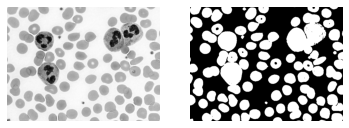

In [ ]:
filename = 'neutrophils.png'

src = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

th = 210
_, dst = cv2.threshold(src, th, 255, cv2.THRESH_BINARY_INV)

plt.subplot(121), plt.axis('off'), imshow("", src)
plt.subplot(122), plt.axis('off'), imshow("", dst)
                       

In [ ]:
def on_threshold(pos):
    _, dst = cv2.threshold(src, pos, 255, cv2.THRESH_BINARY)
    cv2.imshow('dst', dst)


filename = 'neutrophils.png'

src = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

cv2.imshow('src', src)

cv2.namedWindow('dst')
cv2.createTrackbar('Threshold', 'dst', 0, 255, on_threshold)
cv2.setTrackbarPos('Threshold', 'dst', 128)

cv2.waitKey(0)

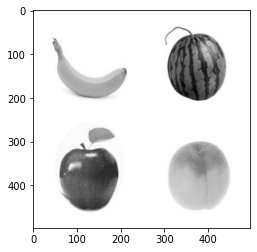

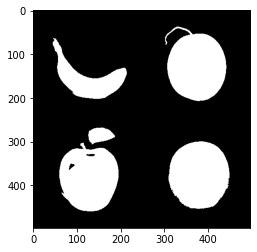

In [ ]:
img  = cv2.imread("fruits.png", 0)
_, img_edge = cv2.threshold(img, 213, 255, cv2.THRESH_BINARY_INV)

imshow("", img)
plt.show()
imshow("", img_edge)

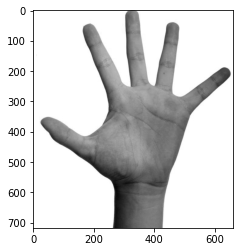

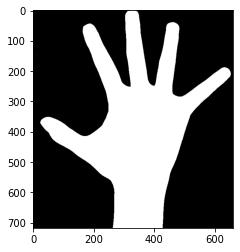

In [ ]:
img  = cv2.imread("5.jpg", 0)
_, img_edge = cv2.threshold(img, 230, 255, cv2.THRESH_BINARY_INV)

imshow("", img)
plt.show()
imshow("", img_edge)

# 개선된 이진화 알고리즘

215.0


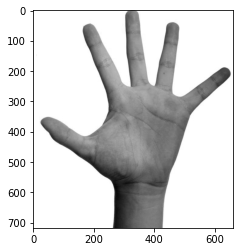

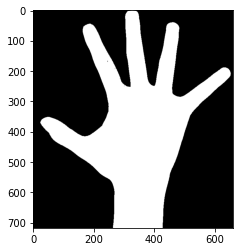

In [ ]:
# 오츠알고리즘

img  = cv2.imread("5.jpg", 0)
th, img_edge = cv2.threshold(img, -1, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

print(th)

imshow("", img)
plt.show()
imshow("", img_edge)

97.0


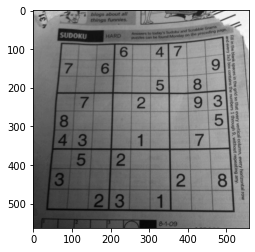

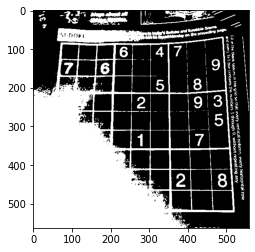

In [ ]:
img  = cv2.imread("sudoku.jpg", 0)
th, img_edge = cv2.threshold(img, -1, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

print(th)

imshow("", img)
plt.show()
imshow("", img_edge)

# 적응형 이진화 방법

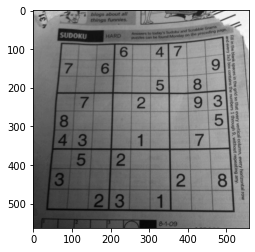

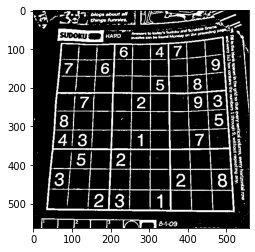

In [ ]:
src  = cv2.imread("sudoku.jpg", 0)

bsize = 31
dst = cv2.adaptiveThreshold(src, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY_INV, bsize, 7)

imshow("", src)
plt.show()
imshow("", dst)


133.0


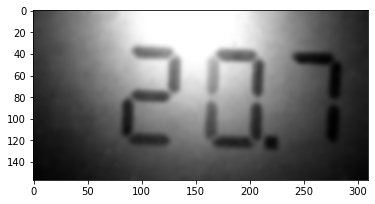

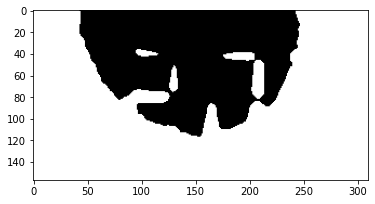

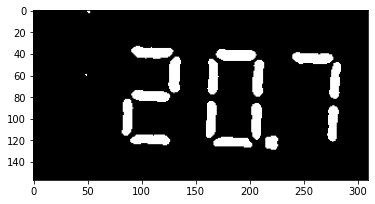

In [ ]:
src  = cv2.imread("207.png", 0)
src = cv2.GaussianBlur(src, (13,13), 0)

bsize = 21

th, dst = cv2.threshold(src,  -1, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
print(th)
dst2 = cv2.adaptiveThreshold(src, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY_INV, bsize, 5)

imshow("", src)
plt.show()
imshow("", dst)
plt.show()
imshow("", dst2)

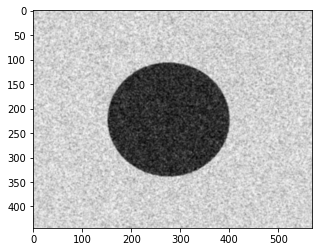

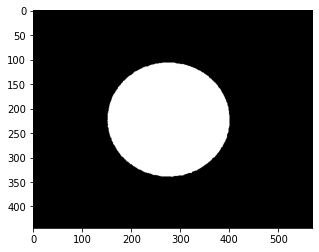

In [ ]:
image = cv2.imread('circle.png',0) 
image = cv2.GaussianBlur(image, (5,5), 0)

_,binary = cv2.threshold(image, -1, 255, cv2.THRESH_BINARY_INV|  cv2.THRESH_OTSU)

imshow("", image)
plt.show()
imshow("", binary)


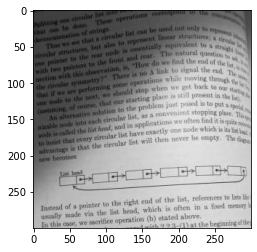

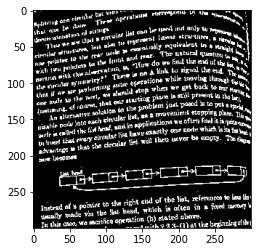

In [ ]:
img = cv2.imread('text.jpg', 0)

dst = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY_INV, 21, 7)

imshow("", img)
plt.show()
imshow("", dst)

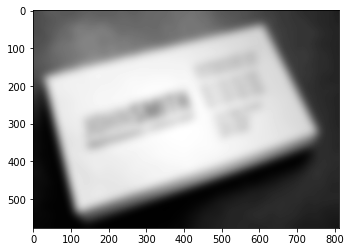

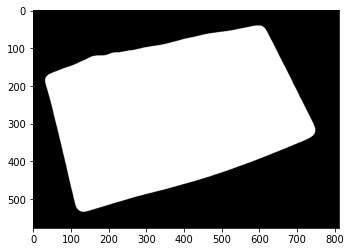

In [ ]:
img = cv2.imread('namecard.png', 0)

img  = cv2.GaussianBlur(img, (75,75), 0)

_, dst = cv2.threshold(img, -1, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

imshow("", img)
plt.show()
imshow("", dst)

# 모폴로지 연산

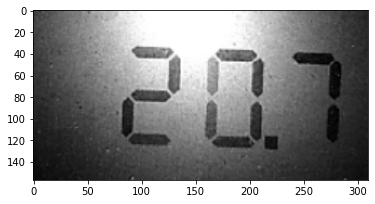

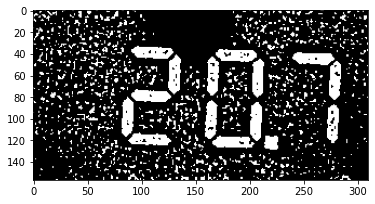

In [ ]:
src  = cv2.imread("207.png", 0)

dst = cv2.adaptiveThreshold(src, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY_INV, bsize, 5)
imshow("", src)
plt.show()
imshow("", dst)

(157, 620)


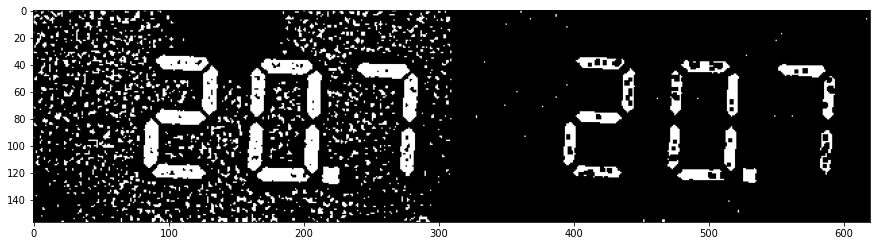

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
erode = cv2.erode(dst, kernel, iterations=1)

output = np.concatenate((dst,  erode),  axis=1)
print(output.shape)

plt.figure(figsize=(15, 10))
imshow("", output)


(157, 620)


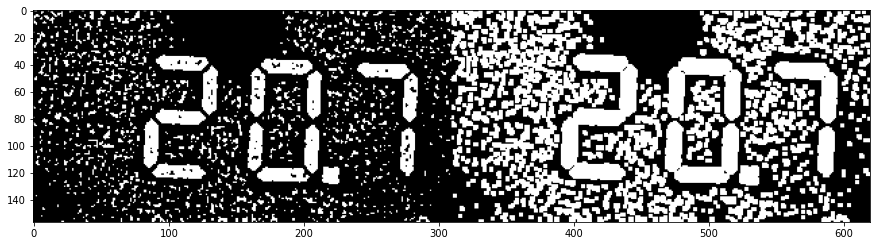

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
dilate = cv2.dilate(dst, kernel, iterations=1)

output = np.concatenate((dst,  dilate),  axis=1)
print(output.shape)

plt.figure(figsize=(15, 10))
imshow("", output)


(157, 620)


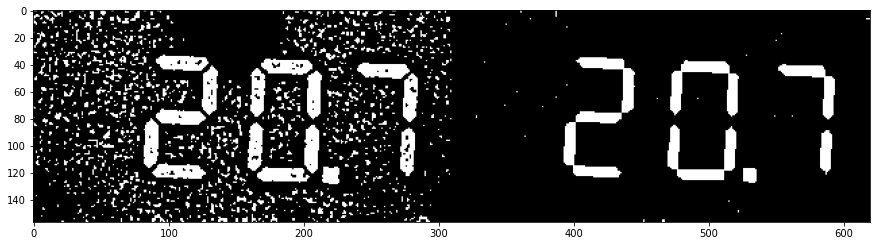

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))


temp = cv2.erode(dst, kernel, iterations=1)
temp = cv2.dilate(temp, kernel, iterations=3)
temp = cv2.erode(temp, kernel, iterations=3)

output = np.concatenate((dst,  temp),  axis=1)
print(output.shape)

plt.figure(figsize=(15, 10))
imshow("", output)

(577, 1622)


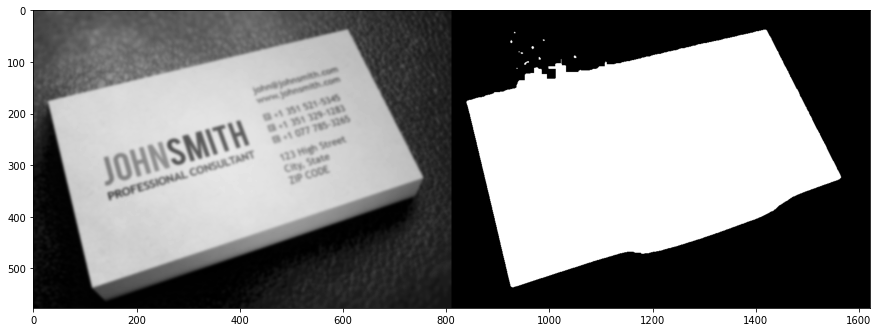

In [ ]:
img = cv2.imread('namecard.png', 0)
img = cv2.GaussianBlur(img, (13, 13), 0)

_,binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

closed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, None,iterations=6)


output = np.concatenate((img,  closed),  axis=1)
print(output.shape)
plt.figure(figsize=(15, 10))
imshow("", output)


# 바둑돌 구분하기

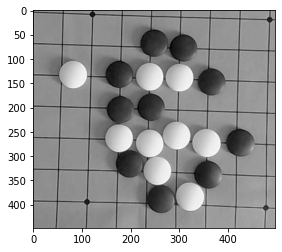

In [ ]:
img = cv2.imread('stone.png', 0)
imshow("", img)

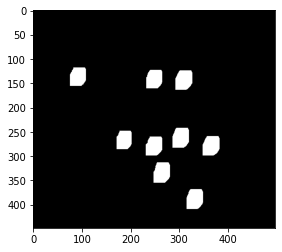

In [ ]:
gray = cv2.GaussianBlur(img, (3, 3), 0)
_,binary = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)

white = cv2.morphologyEx(binary, cv2.MORPH_OPEN, None,iterations=11)

imshow("", white)

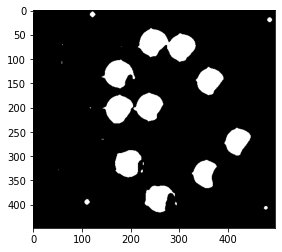

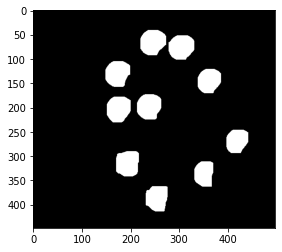

In [ ]:
_,binary = cv2.threshold(gray, 80, 255, cv2.THRESH_BINARY_INV)

black = cv2.morphologyEx(binary, cv2.MORPH_OPEN, None,iterations=9)

imshow("", binary); plt.show()
imshow("", black)

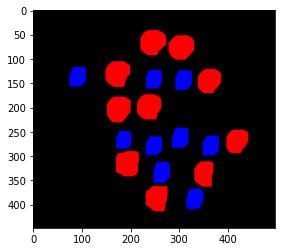

In [ ]:
output = cv2.imread('stone.png')

output[:,:, 0] = white
output[:,:, 1] = 0
output[:,:, 2] = black;

imshow("", output)

# 영상의 미분

[[144 144 146 144 143 136 144 142 146 141]
 [144 144 146 144 143 136 144 142 146 141]
 [144 144 146 144 143 136 144 142 146 141]
 [144 144 146 144 143 136 144 142 146 141]
 [144 144 146 144 143 136 144 142 146 141]
 [145 145 137 135 141 138 139 138 138 140]
 [140 140 143 138 142 140 138 133 138 142]
 [140 140 133 137 139 138 135 135 140 141]
 [133 133 137 136 140 142 135 136 145 136]
 [133 133 136 139 132 133 134 137 141 132]]
[[128 130 128 125 120 129 134 130 127 125]
 [128 130 128 125 120 129 134 130 127 125]
 [128 130 128 125 120 129 134 130 127 125]
 [128 130 128 125 120 129 134 130 127 125]
 [128 130 128 125 120 129 134 130 127 125]
 [128 120 118 132 131 126 128 127 130 122]
 [128 131 126 127 130 124 121 128 137 125]
 [128 121 125 134 129 124 125 133 134 130]
 [128 132 131 131 134 123 122 138 128 119]
 [128 131 134 124 122 130 132 135 123 123]]


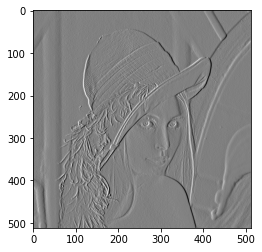

In [ ]:
src = cv2.imread('lenna.bmp', 0)

mask = np.array([[0, 0, 0],
                 [-1, 0, 1],
                 [0, 0, 0]])

#dx = cv2.filter2D(src, cv2.CV_32F, mask)     # clip  0작으면 0,255크면 255
dx = cv2.filter2D(src, -1, mask, delta=128)     # clip  0작으면 0,255크면 255

print(src[0:10, 0:10])
print(dx[0:10, 0:10])

imshow("", dx)


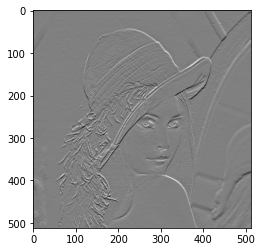

In [ ]:
mask = np.array([[0, -1, 0],
                 [0, 0, 0],
                 [0, 1, 0]])

#dx = cv2.filter2D(src, cv2.CV_32F, mask)     # clip  0작으면 0,255크면 255
dy = cv2.filter2D(src, -1, mask, delta=128)     # clip  0작으면 0,255크면 255
imshow("", dy)

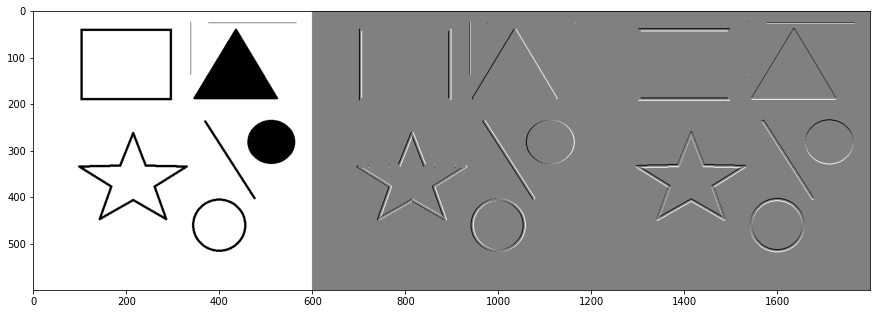

In [ ]:
src = cv2.imread('edge.png', 0)


mask = np.array([[0, 0, 0],
                 [-1, 0, 1],
                 [0, 0, 0]])

dx = cv2.filter2D(src, -1, mask, delta=128)

mask = np.array([[0, -1, 0],
                 [0, 0, 0],
                 [0, 1, 0]])
dy = cv2.filter2D(src, -1, mask, delta=128)

output = np.concatenate((src,  dx, dy),  axis=1)
plt.figure(figsize=(15, 10))
imshow("", output)

In [ ]:
mask = np.array([[0, 0, 0],
                 [-1, 0, 1],
                 [0, 0, 0]])

dx = cv2.filter2D(src, cv2.CV_32F, mask)

mask = np.array([[0, -1, 0],
                 [0, 0, 0],
                 [0, 1, 0]])

dy = cv2.filter2D(src, cv2.CV_32F, mask)

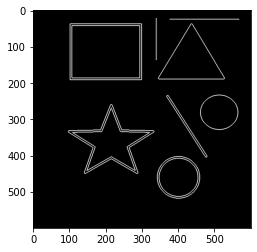

In [ ]:
mag = cv2.magnitude(dx, dy)
mag2 = np.uint8(np.clip(mag, 0, 255))

imshow("", mag2)

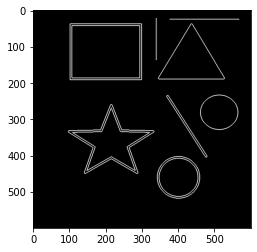

In [ ]:
_, edge = cv2.threshold(mag2, 150, 255, cv2.THRESH_BINARY)
imshow("", edge)

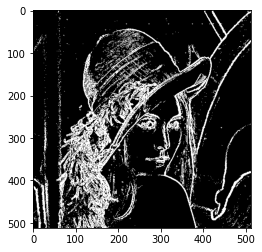

In [ ]:
src = cv2.imread('lenna.bmp', 0)
mask = np.array([[0, 0, 0],
                 [-1, 0, 1],
                 [0, 0, 0]])

dx = cv2.filter2D(src, cv2.CV_32F, mask)

mask = np.array([[0, -1, 0],
                 [0, 0, 0],
                 [0, 1, 0]])

dy = cv2.filter2D(src, cv2.CV_32F, mask)

mag = cv2.magnitude(dx, dy)
mag2 = np.uint8(np.clip(mag, 0, 255))
_, edge = cv2.threshold(mag2, 20, 255, cv2.THRESH_BINARY)
imshow("", edge)

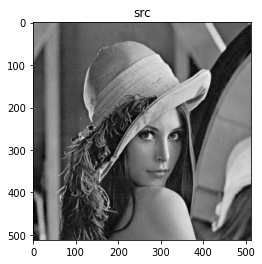

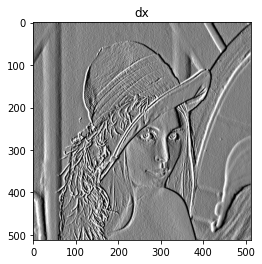

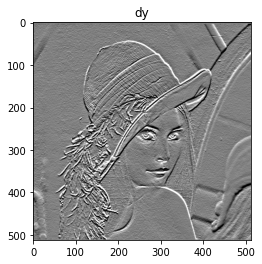

In [ ]:
#sebel 필터
src = cv2.imread('lenna.bmp', cv2.IMREAD_GRAYSCALE)

mx = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]], dtype=np.float32)
my = np.array([[-1, -2, -1],
                   [0, 0, 0],
                   [1, 2, 1]], dtype=np.float32)

dx = cv2.filter2D(src, -1, mx, delta=128)
dy = cv2.filter2D(src, -1, my, delta=128)

imshow('src', src); plt.show()
imshow('dx', dx); plt.show()
imshow('dy', dy); plt.show()

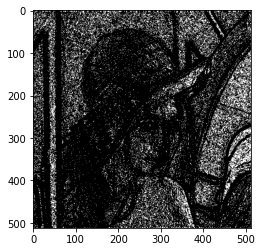

In [ ]:
dx = cv2.Sobel(src, cv2.CV_32F, 1, 0)
dy = cv2.Sobel(src, cv2.CV_32F, 0, 1)

edge  = (cv2.magnitude(dx, dy)  < 10 )*255 #  T_high  100          t_lo  20  20-100?
                                           


imshow("", edge)


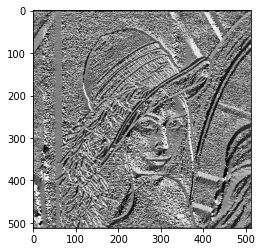

In [ ]:
# 방향성분
#dx = np.array([[0.0]])
#dy = np.array([[1.0]])
#o = cv2.phase(dx, dy, angleInDegrees=True)
#print(o)

angle = cv2.phase(dx, dy, angleInDegrees=True) 
imshow("", angle)
